# Análisis Exploratorio de Supermercado Santa Isabel

<img src="Logo_Santa_Isabel.png" alt="Logo_Santa_Isabel" width="200"/>

## Resumen del proyecto 
En este proyecto, investigo el dataset de productos del supermecado [santaisabel.cl](https://www.santaisabel.cl/). Con el uso de las bibliotecas Python Scipy, NumPy, Pandas, Matplotlib y Seaborn.

### Información del conjunto de datos

**Datos de santaisabel** : Contiene datos de nombre, precios, marcas y categoría ofrecidos en su pagina web de 4470 productos

| Variable     	| Definición                                           	| Ejemplo                                                            	|   	|   	|
|--------------	|------------------------------------------------------	|--------------------------------------------------------------------	|---	|---	|
| title        	| Es el titulo del producto                            	| Pasta dental triple 3 un. 90 g                                     	|   	|   	|
| brand        	| Es la marca del producto                             	| Pepsodent                                                          	|   	|   	|
| normal_price 	| Es el precio normal                                  	| 2.790                                                              	|   	|   	|
| low_price    	| Es el precio con oferta                              	| 2.590                                                              	|   	|   	|
| high_price   	| Es el precio antes de la oferta                      	| 3.190                                                              	|   	|   	|
| oferta       	| Si el producto tiene una oferta                      	| 1                                                                  	|   	|   	|
| categoria1   	| Categoría de los productos                            	| supermercados                                                      	|   	|   	|
| categoria2   	| Subcategoria de los productos                        	| belleza-y-cuidado-personal                                         	|   	|   	|
| datetime     	| Fecha en que se recoletaron los datos                	|                                                         2022-07-16 	|   	|   	|
| Atributos    	| Es el peso del producto                              	| 500 g                                                              	|   	|   	|
| link         	| Enlace hacia el producto                             	| https://www.santaisabel.cl/queso-mantecoso-granulado-c-y-co-250g/p 	|   	|   	|
| sin_stock    	| Si el producto esta disponible                       	| o                                                                  	|   	|   	|
| page         	| Paginas donde se encuentra el producto en la website 	| 3                                                                  	|   	|   	|

## Preguntas iniciales e investigación de datos 
    -  ¿ cual es la distribución de precios de todos los productos ?
    -  ¿ cual es la cantidad de productos con ofertas con respecto a los que no lo tienen ?
    -  ¿ cual es la distribución del precio de los productos con respecto a su categoría y su subcategoria?
    -  ¿ cual es la marca mas frecuente en santaisabel. mayor cantidad de productos ?
    -  ¿ cual es la distribución de los precios con respecto a su categoría, subcategoria y marcas ?
    -  ¿ cuales son los productos mas económicos vs los mas caros por marcas y categoría y subcategorias ?
    
Cargaremos las bibliotecas de Python necesarias para nuestro análisis y leeremos nuestro dataset:

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [3]:
#concateno varios dataset en un solo dataset
df = pd.read_csv('dataset/santaisabel.csv')
df1 = pd.read_csv('dataset/santaisabel_hoy.csv')
df2 = pd.read_csv('dataset/santaisabel_hoy_1.csv')
df3 = pd.read_csv('dataset/santaisabel_hoy_2.csv')
df4 = pd.read_csv('dataset/santaisabel_hoy_3.csv')
df5 = pd.read_csv('dataset/santaisabel_hoy_4.csv')
frames = [df,df1, df2, df3,df4,df5]

result = pd.concat(frames)

In [4]:
result.head()

,title,brand,normal_price,low_price,high_price,oferta,categoria1,categoria2,datetime,Atributos,link,sin_stock,page
0,Pasta dental Ultra Blanco 3 un. 90 g c/u,Colgate,0,$2.590,$3.249,Oferta,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,https://www.santaisabel.cl/crema-dental-colgat...,0,1
1,Pasta dental triple 3 un. 90 g,Pepsodent,0,$2.790,$2.979,Oferta,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,https://www.santaisabel.cl/pasta-de-dientes-pe...,0,1
2,Jabón líquido Dermo Care avena doypack 750 ml,Simond'S,$1.549,0,0,0,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,https://www.santaisabel.cl/jab-n-simond-s-derm...,0,1
3,Jabón líquido original 700 ml,Dove,0,$2.659,$3.549,Oferta,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,https://www.santaisabel.cl/jabon-liquido-cremo...,0,1
4,Pasta dental Xtra Whitening 3 un. 90 g,Pepsodent,0,$2.135,$2.979,Oferta,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,https://www.santaisabel.cl/pasta-de-dientes-pe...,0,1


In [202]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4470 entries, 0 to 41
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         4470 non-null   object
 1   brand         4470 non-null   object
 2   normal_price  4470 non-null   object
 3   low_price     4470 non-null   object
 4   high_price    4470 non-null   object
 5   oferta        4470 non-null   object
 6   categoria1    4470 non-null   object
 7   categoria2    4470 non-null   object
 8   datetime      4470 non-null   object
 9   Atributos     4470 non-null   object
 10  link          4470 non-null   object
 11  sin_stock     4470 non-null   object
 12  page          4470 non-null   int64 
dtypes: int64(1), object(12)
memory usage: 488.9+ KB


## Limpieza de datos
No usaremos la columna 'link' para esta investigación inicial. 

In [203]:
result.drop('link',axis=1,inplace=True)

Revisamos si hay valores nulos 

In [204]:
result.isnull().sum()

title           0
brand           0
normal_price    0
low_price       0
high_price      0
oferta          0
categoria1      0
categoria2      0
datetime        0
Atributos       0
sin_stock       0
page            0
dtype: int64

cambiamos el tipo de columna de fecha de un object a un timetime para poder trabajar con fechas 

In [205]:
result['datetime'] = pd.to_datetime(result['datetime'])

creación de una función para limpiar los signos de las monedas y obtener solo el valor sin comas y le cambiamos su tipo a flotante

In [206]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace('.', '').replace('Normal:','').replace(',',''))
    return(x)

result['low_price'] = result['low_price'].apply(clean_currency).astype('float')
result['high_price'] = result['high_price'].apply(clean_currency).astype('float')
result['normal_price'] = result['normal_price'].apply(clean_currency).astype('float')
#df['low_price'] = df['low_price'].str.replace(',', '').str.replace('$', '')
#df['low_price'].astype(np.float64)
#df['low_price'] = pd.to_numeric(df['low_price'],errors = 'coerce')
#df['low_price'].astype('float')
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4470 entries, 0 to 41
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         4470 non-null   object        
 1   brand         4470 non-null   object        
 2   normal_price  4470 non-null   float64       
 3   low_price     4470 non-null   float64       
 4   high_price    4470 non-null   float64       
 5   oferta        4470 non-null   object        
 6   categoria1    4470 non-null   object        
 7   categoria2    4470 non-null   object        
 8   datetime      4470 non-null   datetime64[ns]
 9   Atributos     4470 non-null   object        
 10  sin_stock     4470 non-null   object        
 11  page          4470 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 454.0+ KB


cambiamos el valor 'Producto sin stock' a 0 y si hay stock a 1
para oferta se hace igual cuando hay oferta se cambia a 1 y cuando no se cambia a cero 

In [207]:
result['sin_stock'] = result['sin_stock'].apply(lambda x:0 if x=='Producto sin stock' else 1)
result['oferta'] = result['oferta'].apply(lambda x:1 if x=='Oferta' else 0)

### valores duplicados
Revisamos si hay valores duplicados en caso de conseguirlos se eliminan 

In [208]:
result.duplicated().sum()

1

In [209]:
df[df.duplicated()==True]

,title,brand,normal_price,low_price,high_price,oferta,categoria1,categoria2,datetime,Atributos,link,sin_stock,page


In [210]:
result.drop_duplicates(keep=False,inplace=True)

## Analisis de Dato

In [211]:
# Make a function to get the composition of the variables per number of products
def Groupby_OneCol_comp_plot(df, col, plt_style = 'seaborn-ticks', color_palette = "coolwarm"):
    '''
    Group by col1, sort by size , return and plot the dataframe with a bar and pie plot
    link -> https://jkarakas.github.io/Exploratory-Analysis-of-the-Titanic-Dataset/Titanic_Dataset_Exploratory_Analysis._With_Code.html
    '''
    gr=pd.DataFrame()
    gr['{} No'.format(col)] = df.groupby(col).size()
    gr['{} Ratio'.format(col)] = np.round(gr['{} No'.format(col)].divide(gr['{} No'.format(col)].sum())*100,0)
    
    print ('Total No. of {}:{}'.format(col,gr['{} No'.format(col)].sum()))
    
    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    
    fig=plt.figure()
    plt.axis('off')

    fig.add_subplot(121)
    
    ax=gr['{} No'.format(col)].plot(kind='bar', title='{} Counts'.format(col), figsize=(16,8), color=sns.color_palette())
    _ = plt.setp(ax.get_xticklabels(), rotation=0)
    for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2),
                                     (p.get_x()+p.get_width()/2., p.get_height()),
                                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.get_yaxis().set_ticks([])
    plt.xlabel('')

    fig.add_subplot(122)
    plt.axis('off')
    gr.loc[:,'{} Ratio'.format(col)].plot(kind= 'pie',
                                     autopct='%1.1f%%',shadow=False,
                                     title='{} Ratio'.format(col), legend=False, labels=None);
    sns.despine(top=True, right=True, left=True, bottom=False);

### Análisis de la Categoría.
iniciamos visualizando la cantidad de productos por la categoría a la que pertenece

Total No. of categoria1:4468


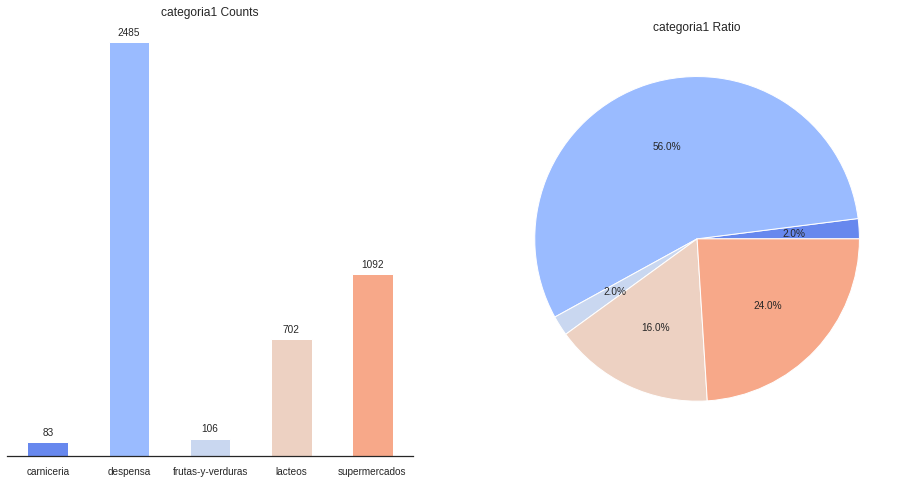

In [212]:
Groupby_OneCol_comp_plot(result, 'categoria1')

vemos que la mayor cantidad de productos se encuentra en la categoría de despensa (2485 de 4470 - 56%) <br>
seguido de la categoría supermercado con (1092 de 4470 - 24%) <br>
y la categoría con menor productos es carnicería con (83 de 4470 - 20%)


In [213]:
def plot(table, legloc='upper right',
                                    plt_style = 'seaborn-ticks',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(19,10), width=0.7 ):     
    grouped = table
    
    #Tranform to percentages
    if percentage == True:
        grouped = np.round(grouped.divide(grouped['Total'],axis=0)*100,0)
    try:   
        del grouped['Total']
    except:
        pass
    
    # rearrange the columns
    if sorter:
        grouped = grouped[sorter]

    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    ax = grouped.plot(kind=kind,stacked=stacked, figsize=figsize, width=width)
    _ = plt.setp(ax.get_xticklabels(), rotation=0)  # Rotate labels
    plt.legend(loc=legloc) # plot the legend normally
    
    #annotate the bars
    if percentage == True:
      for p in ax.patches:
            ax.annotate('{}%'.format(int(np.round(p.get_height(),decimals=2))),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    else:
      for p in ax.patches:
            ax.annotate(np.round(p.get_height(),decimals=2),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    if minimal == True:
        ax.get_yaxis().set_ticks([])
        plt.xlabel('')
        sns.despine(top=True, right=True, left=True, bottom=False);
    else:
        pass     
    # set custom title    
    plt.title(custom_title)
    
def Groupby_TwoCol_Plot(df, col1, col2, legloc='upper right',
                                    plt_style = 'ggplot',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(14,6), width=0.6):   
    
    #Group by Placement and Representative and unstack by Placement
    grouped = df.groupby([col2,col1]).size().unstack(col2)
    
    #Make a totals column sort and delete after
    grouped['Total'] = grouped.sum(axis=1)
    #grouped = grouped.sort_values('Total', ascending = False)
   
    plot(grouped, legloc=legloc,
                                    plt_style = plt_style,
                                    color_palette=color_palette,sorter=sorter, stacked=stacked,
                                    kind = kind , percentage = percentage,
                               custom_title=custom_title, minimal=minimal, figsize=figsize, width=width)

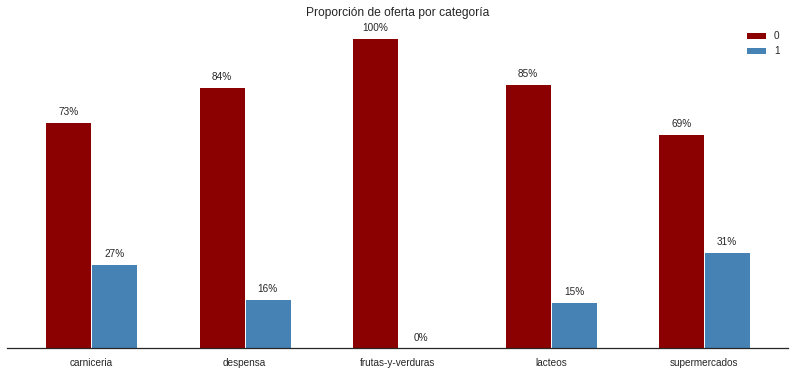

In [214]:
Groupby_TwoCol_Plot(result,'categoria1', 'oferta', color_palette=('darkred','steelblue'),
                    plt_style = 'seaborn-ticks', custom_title='Proporción de oferta por categoría')

santaisabel ofrece descuento en productos de supermercado. luego en productos de carnicería. esto posiblemente se debe a que tienden a dañarse rápidamente

### Distribución de Precios por Categoría

<AxesSubplot:xlabel='categoria1', ylabel='normal_price'>

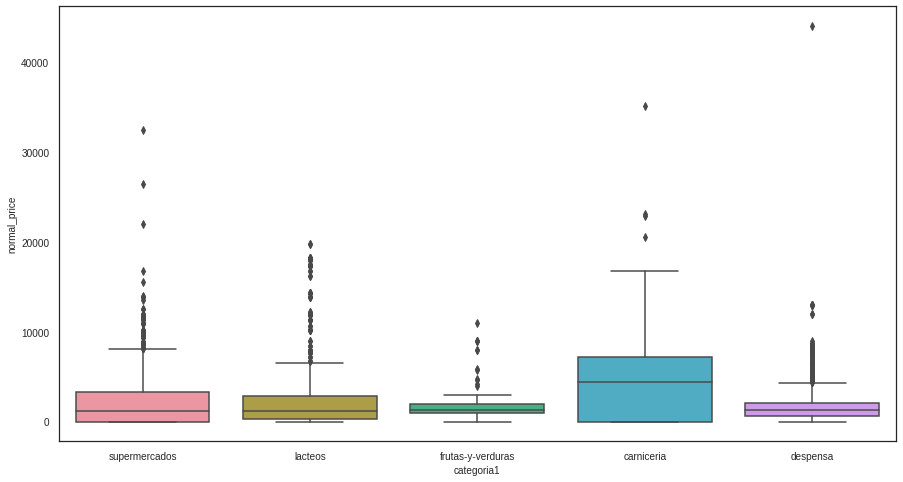

In [215]:
plt.figure(figsize=(15,8))
sns.boxplot(data=result,x='categoria1',y='normal_price')

<AxesSubplot:xlabel='categoria1', ylabel='normal_price'>

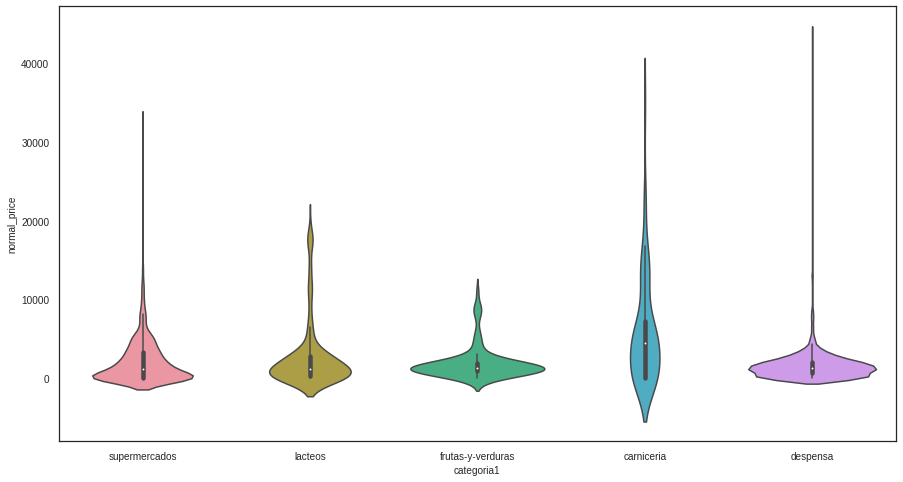

In [216]:
plt.figure(figsize=(15,8))
sns.violinplot(data=result,x='categoria1',y='normal_price')

In [221]:
result.groupby(['categoria1'])['normal_price'].agg([np.mean,np.sum,max])

,mean,sum,max
categoria1,,,
carniceria,5866.867470,486950.0,35178.0
despensa,1535.796378,3816454.0,44028.0
frutas-y-verduras,1905.698113,202004.0,10990.0
lacteos,2766.038462,1941759.0,19788.0
supermercados,2139.470696,2336302.0,32490.0


vemos como se distribuyen los precios de acuerdo a la categorías. en donde carnicería tiene una mediana mas alta que otras categoría ademas tiene una mayor dispersión, es decir una mayor variedad de precios. mientras que frutas y verduras es la categoría con una menor variabilidad. lo cual quiere decir que los precios de frutas y verduras son muy similares. todos los productos tiene su mayor densidad de valor por debajo de los 10 mil pesos. lo cual significa que es muy extraño conseguir productos con un valor por encima de 10 mil pesos
<br>
**nota**:todas las categorías tienen valores atípicos

### Analisis de SubCategorias 

[Text(0, 0, 'belleza-y-cuidado-personal'),
 Text(1, 0, 'vinos-cervezas-y-licores'),
 Text(2, 0, 'congelados'),
 Text(3, 0, 'desayuno-y-dulces'),
 Text(4, 0, 'lacteos'),
 Text(5, 0, 'postres'),
 Text(6, 0, 'mantequillas-y-margarinas'),
 Text(7, 0, 'leches'),
 Text(8, 0, 'frutas'),
 Text(9, 0, 'verduras'),
 Text(10, 0, 'frutos-secos-y-semillas'),
 Text(11, 0, 'vacuno'),
 Text(12, 0, 'cerdo'),
 Text(13, 0, 'pavo'),
 Text(14, 0, 'pollo'),
 Text(15, 0, 'conservas'),
 Text(16, 0, 'harina-y-complementos'),
 Text(17, 0, 'aderezos-y-salsas'),
 Text(18, 0, 'pastas-y-salsas'),
 Text(19, 0, 'arroz-y-legumbres'),
 Text(20, 0, 'aceites-sal-y-condimentos'),
 Text(21, 0, 'coctel'),
 Text(22, 0, 'instantaneos-y-sopas'),
 Text(23, 0, 'reposteria'),
 Text(24, 0, 'comidas-preparadas'),
 Text(25, 0, 'pescaderia')]

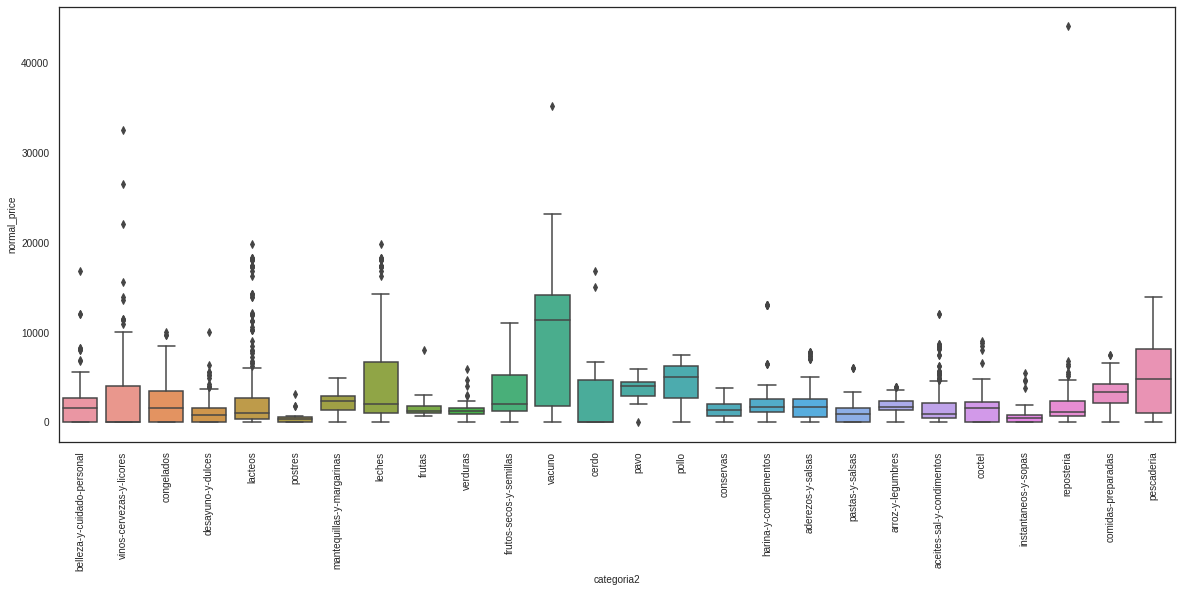

In [219]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(data=result,x='categoria2',y='normal_price')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

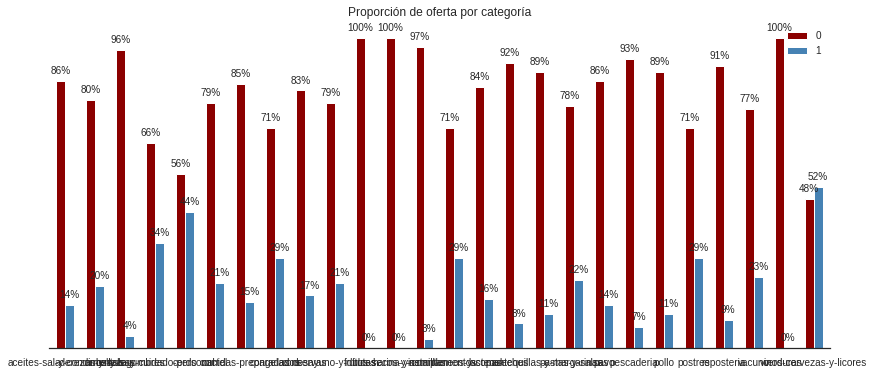

In [222]:
Groupby_TwoCol_Plot(result,'categoria2', 'oferta', color_palette=('darkred','steelblue'),
                    plt_style = 'seaborn-ticks', custom_title='Proporción de oferta por subcategoría')

In [220]:
result.groupby(['categoria2'])['normal_price'].agg([np.mean,np.sum,max])

,mean,sum,max
categoria2,,,
aceites-sal-y-condimentos,1639.563218,570568.0,11969.0
aderezos-y-salsas,1750.132353,714054.0,7819.0
arroz-y-legumbres,1723.292683,565240.0,3899.0
belleza-y-cuidado-personal,1783.620833,428069.0,16799.0
cerdo,2995.111111,80868.0,16784.0
coctel,1527.136929,368040.0,8990.0
comidas-preparadas,3095.043478,142372.0,7485.0
congelados,2081.697095,501689.0,9979.0
conservas,1356.887500,651306.0,3769.0


De las subcategorias. la que tiene una mayor dispersión es la carne de vacuno seguido de la pescaderia en cambio en postres, instantáneos-salsa y frutas tienen poca variabilidad
y su valor tiende a cero y el que tiene mas valores atípico son los productos lácteos

### Distribución de los precios 

In [176]:
prices = result[['normal_price','low_price','high_price']]

/home/edwight/Descargas/tion/envs/DL/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='normal_price', ylabel='Density'>

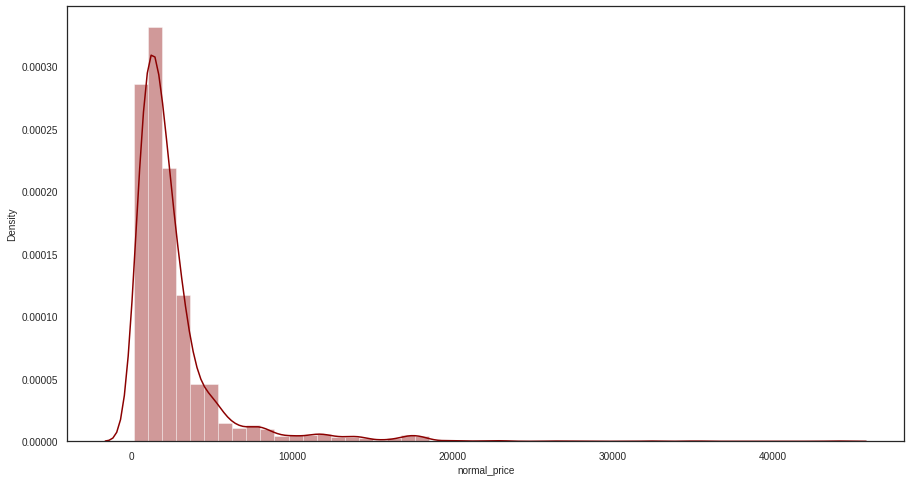

In [185]:
plt.figure(figsize=(15,8))

low_price = result[result['low_price']>0]['low_price'].dropna()
normal_price = result[result['normal_price']>0]['normal_price'].dropna()
high_price = result[result['high_price']>0]['high_price'].dropna()
#sns.distplot(low_price)
sns.distplot(normal_price)
#sns.distplot(high_price)

Una pregunta interesante es donde esta acumulada la mayor densidad del valor en pesos de todos los productos ?
En la grafica se nos muestra que de 0 a 10 mil pesos chilenos es donde se acumula el mayor valor. Esto implica que la mayoría 
de los productos que se encuentran disponibles están en un rango de 10 mil pesos.

### Analisis de Ofertas

In [224]:
oferta_count = result.groupby('oferta')['oferta'].count()
oferta_count

oferta
0    3611
1     857
Name: oferta, dtype: int64

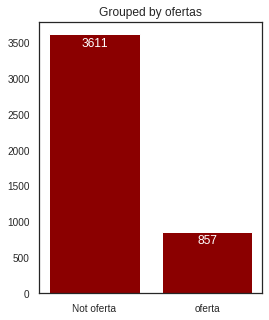

In [223]:
plt.figure(figsize=(4,5))
plt.bar(oferta_count.index, oferta_count.values)
plt.title('Grouped by ofertas')
plt.xticks([0,1],['Not oferta', 'oferta'])
for i, value in enumerate(oferta_count.values):
    plt.text(i, value-120, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

3611 productos no tiene oferta mientas que 857 si tiene ofertas 

### Análisis de Stock

In [250]:
no_stock_count = result.groupby('sin_stock')['sin_stock'].count()
no_stock_count

sin_stock
0     207
1    4261
Name: sin_stock, dtype: int64

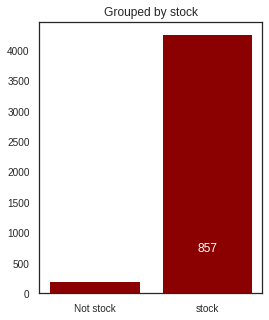

In [251]:
plt.figure(figsize=(4,5))
plt.bar(no_stock_count.index, no_stock_count.values)
plt.title('Grouped by stock')
plt.xticks([0,1],['Not stock', 'stock'])
for i, value in enumerate(oferta_count.values):
    plt.text(i, value-120, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

Solo 207 productos no están disponibles en el dataset

### Análisis de Marcas

 - ¿ cuales son las marcas con mayor cantidad de productos ?

In [252]:
no_stock_count = df.groupby('brand')['brand'].count()
no_stock_count.sort_values(ascending=False)[:10]

brand
Soprole                      159
Colun                        142
Cuisine & Co                 111
Loncoleche                    87
Frutas Y Verduras Propias     74
Nestlé                        71
Costa                         41
Savory                        32
Concha Y Toro                 28
Surlat                        26
Name: brand, dtype: int64

    - ¿ cuales de esas marcas tienen los precios mas caros y el mayor promedio y cuanto suman su valor en pesos sus productos ?

In [246]:
result.groupby(['brand']).agg({'normal_price':sum}).sort_values(by='normal_price',ascending=False).head(10)


,normal_price
brand,
Cuisine & Co,1173175.0
Colun,486303.0
Loncoleche,451933.0
Soprole,347374.0
Gourmet,245559.0
Al Vacío,229995.0
Banquete,164628.0
Carozzi,151432.0
San Francisco De Loncomilla,104018.0


Couisine & Co es el que suma mas valor monetario con un total de un millón ciento setenta y tres mil pesos con ciento setenta y cinco pesos

In [253]:
result.groupby(['brand']).agg({'normal_price':np.mean}).sort_values(by='normal_price',ascending=False).head(10)

,normal_price
brand,
Chivas Regal,32490.0
Jack Daniel'S,26460.0
Estados Unidos,22941.0
Plenitud,16799.0
Americano,15879.5
Bob'S Red Mill,12999.0
Ballantine'S,11490.0
Sombrero Negro,11390.0
Ramazzotti,11290.0


El que tiene un promedio mas elevado es la marca chivas Regal con treinta y dos mil pesos

In [248]:
result.groupby(['brand']).agg({'normal_price':max}).sort_values(by='normal_price',ascending=False).head(10)

,normal_price
brand,
Cuisine & Co,44028.0
Al Vacío,35178.0
Chivas Regal,32490.0
Jack Daniel'S,26460.0
Estados Unidos,22941.0
Cusqueña,21990.0
Loncoleche,19788.0
Soprole,18228.0
Colun,17388.0


Coisine & Co es la marca que tiene el producto mas caro

/home/edwight/Descargas/tion/envs/DL/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/edwight/Descargas/tion/envs/DL/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


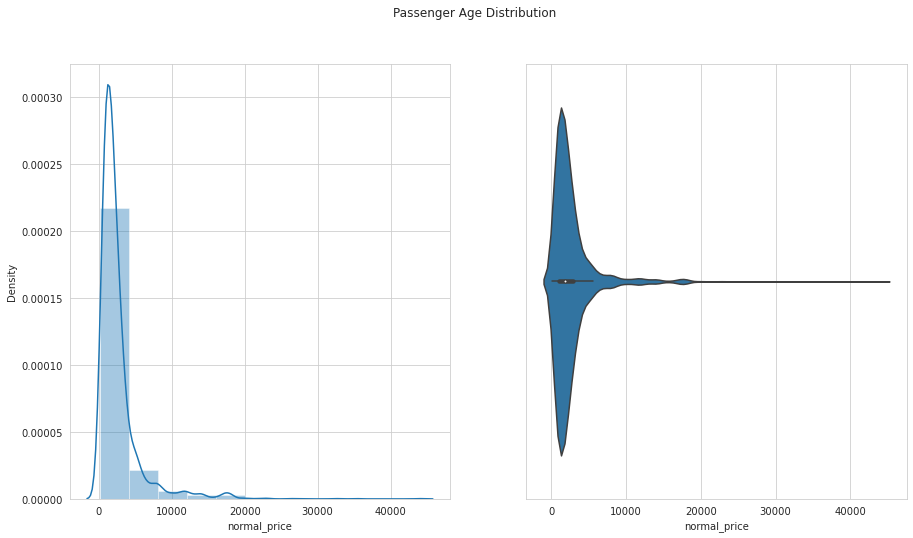

In [134]:
ax=plt.figure(figsize=(15,8))
plt.suptitle('Passenger Age Distribution')
ax.add_subplot(121)
price = result[result['normal_price']>0]['normal_price']
sns.distplot(price,bins=11)
ax.add_subplot(122)
sns.violinplot(price);

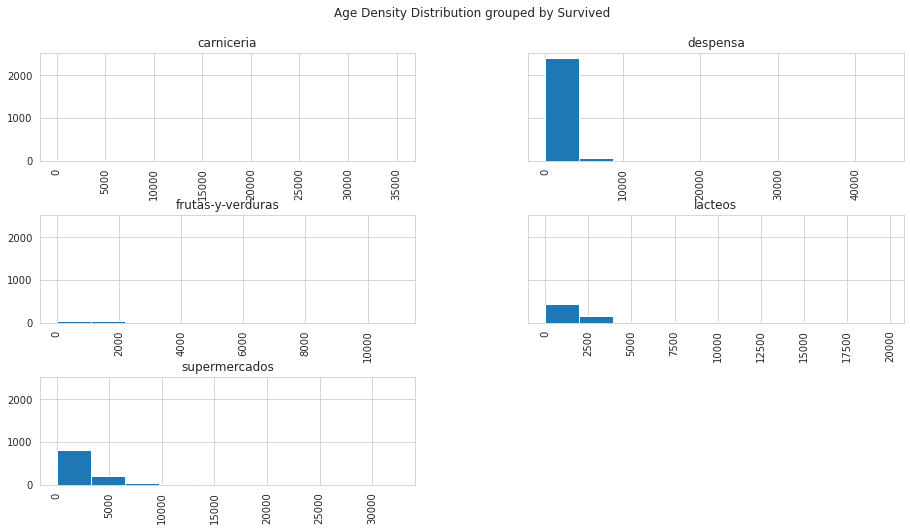

In [138]:
result.hist(column="normal_price",by="categoria1",sharey=True,figsize=(15,8))
plt.suptitle('Age Density Distribution grouped by Survived');

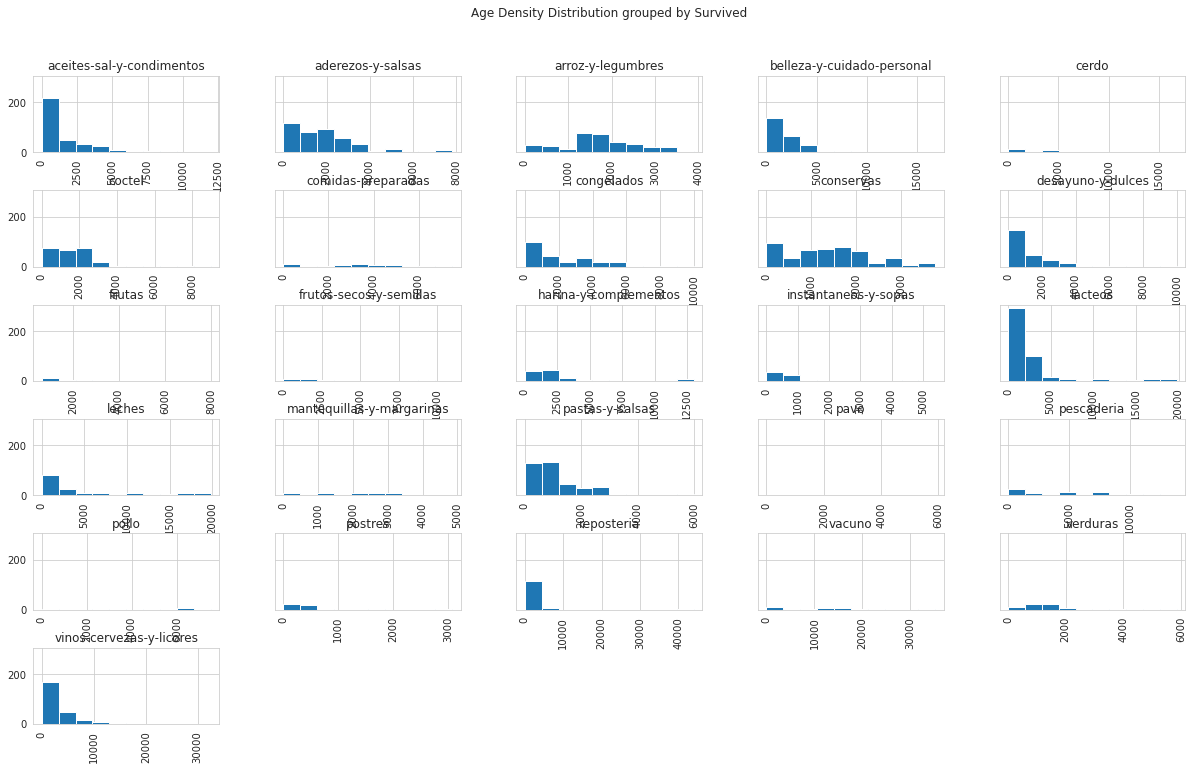

In [140]:
result.hist(column="normal_price",by="categoria2",sharey=True,figsize=(20,12))
plt.suptitle('Age Density Distribution grouped by Survived');

In [142]:
result['Atributos'].unique()

array(['1 un', '500 g', '100 g', '1.5 kg', '1.7 kg', '1.6 kg', '300 g',
       '1.3 kg', '1 kg', '2 kg', '400 g', '2.2 kg', '1.4 kg', '900 g',
       '2.5 kg', '2.3 kg', '800 g'], dtype=object)

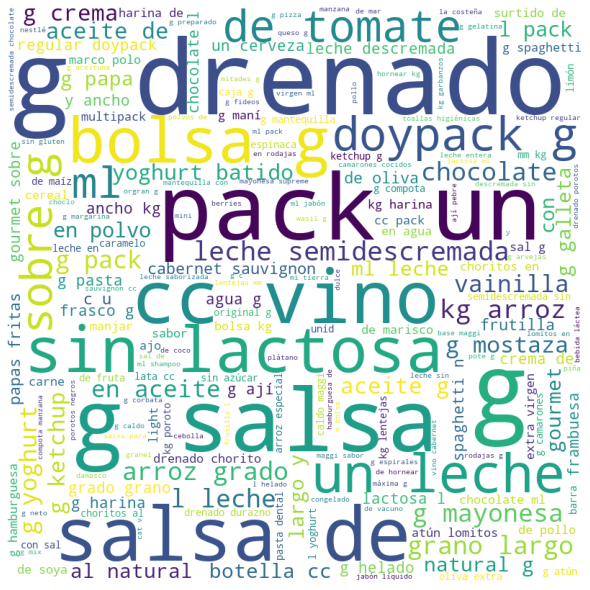

In [254]:
comment_words = ''
stopwords = set(STOPWORDS)
 
    
# iterate through the csv file
for val in result['title']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [6]:
result['title'].value_counts(dropna=False).head(15)

Mantequilla con sal 250 g                 12
Lasaña precocida 360 g                     9
Mostaza 240 g                              9
Harina con polvos de hornear 1 kg          9
Salsa de tomate italiana 200 g             9
Ketchup 397 g                              9
Atún lomitos en agua 104 g drenado         9
Compota manzana 90 g                       9
Arroz grado 1 grano largo y ancho 1 kg     8
Porotos negros bolsa 1 kg                  8
Arroz grado 2 grano largo y ancho 1 kg     8
Aceite de Oliva extra virgen 500 ml        8
Quinoa tricolor 250 g                      8
Garbanzos pelados 1 kg                     8
Corbatas 400 g                             6
Name: title, dtype: int64